# Predicción sobre AL2-FIUNA


---


Estudiantes:

*   Marcos Ibañez
*   Hugo Melgarejo



# Importamos las librerias necesarias




In [1]:
#Importamos las librerias de pandas,numpy,matplotlib y sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
import seaborn as sns
from math import ceil
#Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Importamos nuestra base de datos desde Github

In [2]:
url = 'https://raw.githubusercontent.com/diegostaPy/cursoIA/main/datosRendimiento/datosfiltrados.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,ix,Id,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,id_anony
0,135020,503,2017,1,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,N,0,7,0,0,0,0,NaN,es_1444
1,135021,504,2017,1,13008,CALCULO 2,CGF-PLS13,2,1,2017,1,N,0,5,0,0,0,0,NaN,es_4238
2,135022,505,2017,1,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,S,2016,0,0,0,0,0,"1F-1,2F-2",es_4245
3,135023,506,2017,1,13008,CALCULO 2,CIV-PLS13,2,1,2017,1,N,0,0,0,0,0,0,NaN,es_4967
4,135024,507,2017,1,13008,CALCULO 2,CGF-PLS13,2,1,2017,1,S,2017,21,10,0,0,0,3F-C-3,es_414


# Realizamos el pre-procesamiento de los datos

Reemplazamos la entrada aprobado que tiene valores S y N a 1 y 0, para realizar la predicción.

In [4]:
df['Aprobado'] = df['Aprobado'].replace(['S','N'],[1,0])
df.head()

,ix,Id,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,id_anony
0,135020,503,2017,1,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,0,0,7,0,0,0,0,NaN,es_1444
1,135021,504,2017,1,13008,CALCULO 2,CGF-PLS13,2,1,2017,1,0,0,5,0,0,0,0,NaN,es_4238
2,135022,505,2017,1,13008,CALCULO 2,ELE-PLS13,2,1,2017,1,1,2016,0,0,0,0,0,"1F-1,2F-2",es_4245
3,135023,506,2017,1,13008,CALCULO 2,CIV-PLS13,2,1,2017,1,0,0,0,0,0,0,0,NaN,es_4967
4,135024,507,2017,1,13008,CALCULO 2,CGF-PLS13,2,1,2017,1,1,2017,21,10,0,0,0,3F-C-3,es_414


Separamos los campos referentes a la materia de interes.

In [5]:
df = df[df['Asignatura'] == 'ALGEBRA LINEAL 2']
df.head()

,ix,Id,danho,ciclo,Cod.Asign,Asignatura,Cod.Car.Sec,Cod.Curso,Convocatoria,Anho,Semestre,Aprobado,Anho.Firma,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec,Nota.Final,id_anony
451,135471,954,2017,1,13009,ALGEBRA LINEAL 2,CIV-PLS13,2,1,2017,1,0,0,0,0,0,0,0,NaN,es_4244
452,135472,955,2017,1,13009,ALGEBRA LINEAL 2,MCT-PLS13,2,1,2017,1,0,0,4,19,0,0,0,NaN,es_1696
453,135473,956,2017,1,13009,ALGEBRA LINEAL 2,CGF-PLS13,2,1,2017,1,0,0,3,0,0,0,0,NaN,es_4238
454,135474,957,2017,1,13009,ALGEBRA LINEAL 2,CIV-PLS13,2,1,2017,1,0,0,3,1,0,0,0,NaN,es_4967
455,135475,958,2017,1,13009,ALGEBRA LINEAL 2,CIV-PLS13,2,1,2017,1,0,2017,4,19,0,0,0,"2F-C-1,3F-C-1",es_4554


In [6]:
df = df[['Primer.Par','Segundo.Par','Aprobado']]
df

,Primer.Par,Segundo.Par,Aprobado
451,0,0,0
452,4,19,0
453,3,0,0
454,3,1,0
455,4,19,0
...,...,...,...
15862,4,0,0
15863,18,29,1
15864,7,0,0
15865,7,18,0


A partir de ahora separamos los datos de interes como datos y etiquetas.

Datos
*   Primer Parcial
*   Segundo Parcial


Etiquetas:

*   Aprobado





In [7]:
X = df[['Primer.Par','Segundo.Par']].values
Y = df[['Aprobado']].values

Ralizamos un gráfico para observar la situación y notamos que es posible realizar una frontera para clasificar a aprobados y reprobados, aunque la misma no será exacta siempre.

<function matplotlib.pyplot.show(close=None, block=None)>

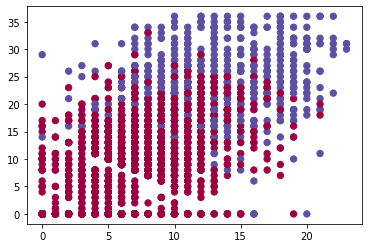

In [8]:
plt.scatter(X[:,0],X[:,1],s=40,c=Y,cmap=plt.cm.Spectral)
plt.show


Separamos los datos en entrenamiento y test.

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state = 1234,shuffle = True)


Escalamos los datos

In [10]:
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Creamos la red neuronal con Keras

Ahora creamos la red neuronal.

In [11]:
model = Sequential()
model.add(Dense(2, activation='linear',input_shape = (2,),name = "Capa_de_Entrada"))
model.add(Dense(20,activation='relu', name="Capa_Oculta"))
model.add(Dense(1,activation = 'sigmoid',name = "Capa_de_Salida"))

Configuramos el modelo

In [12]:
model.compile(loss = 'binary_crossentropy',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_de_Entrada (Dense)      (None, 2)                 6         
_________________________________________________________________
Capa_Oculta (Dense)          (None, 20)                60        
_________________________________________________________________
Capa_de_Salida (Dense)       (None, 1)                 21        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1500
52/52 [==============================] - 0s 3ms/step - loss: 0.5617 - val_loss: 0.4889
Epoch 2/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4971 - val_loss: 0.4357
Epoch 3/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4676 - val_loss: 0.4089
Epoch 4/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4500 - val_loss: 0.3923
Epoch 5/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.4383 - val_loss: 0.3830
Epoch 6/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4307 - val_loss: 0.3762
Epoch 7/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4250 - val_loss: 0.3744
Epoch 8/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4206 - val_loss: 0.3721
Epoch 9/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4162 - val_loss: 0.3704
Epoch 10/1500
52/52 [==============================] - 0s 1ms/step - loss: 0.4131 - val_loss: 0.3679

52/52 [==============================] - 0s 2ms/step - loss: 0.3876 - val_loss: 0.3523
Epoch 163/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3871 - val_loss: 0.3517
Epoch 164/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3872 - val_loss: 0.3525
Epoch 165/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3869 - val_loss: 0.3520
Epoch 166/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3875 - val_loss: 0.3524
Epoch 167/1500
52/52 [==============================] - ETA: 0s - loss: 0.387 - 0s 2ms/step - loss: 0.3871 - val_loss: 0.3530
Epoch 168/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3871 - val_loss: 0.3523
Epoch 169/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3871 - val_loss: 0.3516
Epoch 170/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3872 - val_loss: 0.3526
Epoch 171/1500
52/52 [==============================] - 0s 2ms/step - los

Epoch 321/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3856 - val_loss: 0.3496
Epoch 322/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3850 - val_loss: 0.3509
Epoch 323/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3849 - val_loss: 0.3502
Epoch 324/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3850 - val_loss: 0.3505
Epoch 325/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3851 - val_loss: 0.3503
Epoch 326/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3853 - val_loss: 0.3502
Epoch 327/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3850 - val_loss: 0.3500
Epoch 328/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3851 - val_loss: 0.3511
Epoch 329/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3853 - val_loss: 0.3498
Epoch 330/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3849

52/52 [==============================] - 0s 2ms/step - loss: 0.3843 - val_loss: 0.3505
Epoch 402/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3494
Epoch 403/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3843 - val_loss: 0.3508
Epoch 404/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3510
Epoch 405/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3843 - val_loss: 0.3522
Epoch 406/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3507
Epoch 407/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3843 - val_loss: 0.3519
Epoch 408/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3503
Epoch 409/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3844 - val_loss: 0.3498
Epoch 410/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3845 - val_loss: 0.

Epoch 481/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3839 - val_loss: 0.3501
Epoch 482/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3845 - val_loss: 0.3489
Epoch 483/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3837 - val_loss: 0.3498
Epoch 484/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3839 - val_loss: 0.3491
Epoch 485/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3840 - val_loss: 0.3519
Epoch 486/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3843 - val_loss: 0.3504
Epoch 487/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3849 - val_loss: 0.3492
Epoch 488/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3838 - val_loss: 0.3497
Epoch 489/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3837 - val_loss: 0.3501
Epoch 490/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3837

52/52 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3476
Epoch 642/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3837 - val_loss: 0.3478
Epoch 643/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3487
Epoch 644/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3833 - val_loss: 0.3495
Epoch 645/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3477
Epoch 646/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3833 - val_loss: 0.3486
Epoch 647/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3481
Epoch 648/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3486
Epoch 649/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3838 - val_loss: 0.3496
Epoch 650/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.

52/52 [==============================] - 0s 2ms/step - loss: 0.3835 - val_loss: 0.3473
Epoch 802/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3834 - val_loss: 0.3484
Epoch 803/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3477
Epoch 804/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3829 - val_loss: 0.3483
Epoch 805/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3488
Epoch 806/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3487
Epoch 807/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.3482
Epoch 808/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3833 - val_loss: 0.3482
Epoch 809/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.3481
Epoch 810/1500
52/52 [==============================] - ETA: 0s - loss: 0.391 - 0s 2ms/step - los

52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3472
Epoch 962/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3480
Epoch 963/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.3482
Epoch 964/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3829 - val_loss: 0.3470
Epoch 965/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3829 - val_loss: 0.3475
Epoch 966/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3827 - val_loss: 0.3479
Epoch 967/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3827 - val_loss: 0.3479
Epoch 968/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3827 - val_loss: 0.3486
Epoch 969/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3831 - val_loss: 0.3472
Epoch 970/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.

52/52 [==============================] - 0s 2ms/step - loss: 0.3826 - val_loss: 0.3472
Epoch 1120/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3495
Epoch 1121/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3492
Epoch 1122/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3832 - val_loss: 0.3491
Epoch 1123/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3491
Epoch 1124/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3827 - val_loss: 0.3486
Epoch 1125/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3824 - val_loss: 0.3484
Epoch 1126/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3826 - val_loss: 0.3482
Epoch 1127/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3473
Epoch 1128/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3829 - val

52/52 [==============================] - 0s 2ms/step - loss: 0.3830 - val_loss: 0.3462
Epoch 1278/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3824 - val_loss: 0.3486
Epoch 1279/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3823 - val_loss: 0.3482
Epoch 1280/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3826 - val_loss: 0.3476
Epoch 1281/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3829 - val_loss: 0.3468
Epoch 1282/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3826 - val_loss: 0.3488
Epoch 1283/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3828 - val_loss: 0.3466
Epoch 1284/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3826 - val_loss: 0.3479
Epoch 1285/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3826 - val_loss: 0.3471
Epoch 1286/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3822 - val

52/52 [==============================] - 0s 2ms/step - loss: 0.3822 - val_loss: 0.3462
Epoch 1436/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3824 - val_loss: 0.3481
Epoch 1437/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3821 - val_loss: 0.3481
Epoch 1438/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3822 - val_loss: 0.3477
Epoch 1439/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3824 - val_loss: 0.3489
Epoch 1440/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3822 - val_loss: 0.3465
Epoch 1441/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3825 - val_loss: 0.3472
Epoch 1442/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3823 - val_loss: 0.3489
Epoch 1443/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3823 - val_loss: 0.3481
Epoch 1444/1500
52/52 [==============================] - 0s 2ms/step - loss: 0.3822 - val

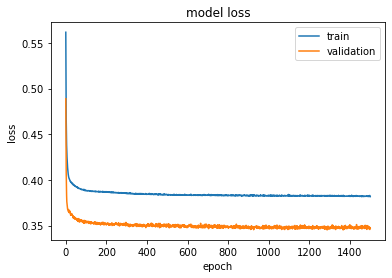

In [13]:
history = model.fit(X_train, Y_train, epochs=1500 , batch_size=32, verbose=1, validation_split=0.2)
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Comenzamos a entrenar el modelo

Evaluamos el error del modelo

In [14]:
print(model.evaluate(X, Y))
print(model.metrics_names)

81/81 [==============================] - 0s 1ms/step - loss: 14.9326
14.93262767791748
['loss']


Imprimimos la matriz de confusión

In [15]:
from sklearn.metrics import confusion_matrix, classification_report  
predictions = model.predict(X_test)

predict_label = predictions.reshape(-1).round()

print('Cantidad de predicciones = {} \n'.format(predict_label.shape))

cf_matrix = confusion_matrix(Y_test, predict_label)
print(cf_matrix)

Cantidad de predicciones = (517,) 

[[281  33]
 [ 42 161]]


Graficamos la matriz de confusión.

<AxesSubplot:>

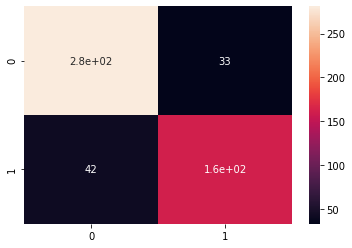

In [16]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

<AxesSubplot:>

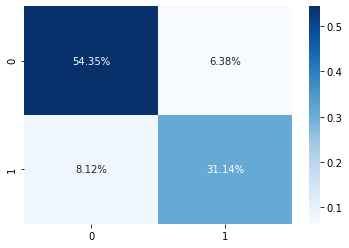

In [17]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Creamos el reporte del modelo

In [18]:
report = classification_report(Y_test, predict_label)  
print(report)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       314
           1       0.83      0.79      0.81       203

    accuracy                           0.85       517
   macro avg       0.85      0.84      0.85       517
weighted avg       0.85      0.85      0.85       517



In [20]:
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score
predictions = model.predict(Y_test)
predict_label = predictions.reshape(-1).round()


exactitud=accuracy_score(labels_test, predict_label)*100
print('Exactitud del modelo: ',exactitud,' %')


ValueError: in user code:

    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    D:\Anaconda\envs\Inteligencia_Artificial\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [None, 1]


Prueba


In [ ]:
X_new = pd.DataFrame({'Primer.Par': [24], 'Segundo.Par': [36]})
model.predict(X_new)[0][0]